# Enedis - Consommation électrique annuelle à la maille commune

## Exploratory Data Analysis

Dataset : https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/information/?sort=annee


Import the usual libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read CSV file into dataframe

In [2]:
df_total = pd.read_csv("../consommation-electrique-par-secteur-dactivite-commune.csv",delimiter=";", header=0)

In [3]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234559 entries, 0 to 234558
Data columns (total 43 columns):
Année                                     234559 non-null int64
Nom commune                               234559 non-null object
Code commune                              234559 non-null int64
Nom EPCI                                  234559 non-null object
Code EPCI                                 234559 non-null object
Type EPCI                                 234559 non-null object
Nom département                           234559 non-null object
Code département                          234559 non-null int64
Nom région                                234559 non-null object
Code région                               234559 non-null int64
Nb sites Résidentiel                      202790 non-null float64
Conso totale Résidentiel (MWh)            202790 non-null float64
Conso moyenne Résidentiel (MWh)           202790 non-null float64
Nb sites Professionnel                    202

In [4]:
df_total[df_total["Code commune"] == 17097]

,Année,Nom commune,Code commune,Nom EPCI,Code EPCI,Type EPCI,Nom département,Code département,Nom région,Code région,...,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2010,Résidences principales après 2011,Taux de chauffage électrique,Geo Shape,Geo Point 2D
0,2015,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
13,2012,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
71308,2014,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
77979,2013,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
79904,2016,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
113265,2011,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
129380,2017,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.66668,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,"{""type"": ""Polygon"", ""coordinates"": [[[-0.92255...","45.6408405771, -0.902110129819"


Copy part of the dataframe for easier analysis

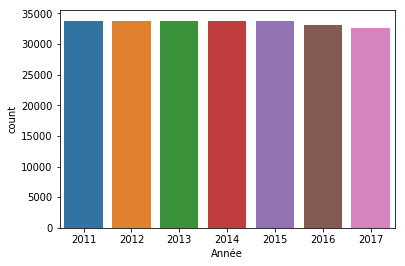

In [47]:
sns.countplot(x="Année",data=df_total)

In [48]:
df_total.drop(axis=1,columns=["Geo Shape", "Geo Point 2D"], inplace=True)

In [49]:
df_total.dropna(inplace=True)

In [40]:
#df_total.to_csv("ENEDIS_data_preprocessed.csv", index=False, header=False, sep=";")

In [41]:
conso_moyenne_Residence = df_total["Conso moyenne Résidentiel (MWh)"].mean()
conso_moyenne_Profess = df_total["Conso moyenne Professionnel (MWh)"].mean()
conso_moyenne_Agri = (df_total["Conso totale Agriculture (MWh)"] / df_total["Nb sites Agriculture"]).mean()
conso_moyenne_Industrie = (df_total["Conso totale Industrie (MWh)"] / df_total["Nb sites Industrie"]).mean()
conso_moyenne_Tertiaire = (df_total["Conso totale Tertiaire (MWh)"] / df_total["Nb sites Tertiaire"]).mean()
conso_moyenne_Autres = (df_total["Conso totale Secteur non affecté (MWh)"] / df_total["Nb sites Secteur non affecté"]).mean()

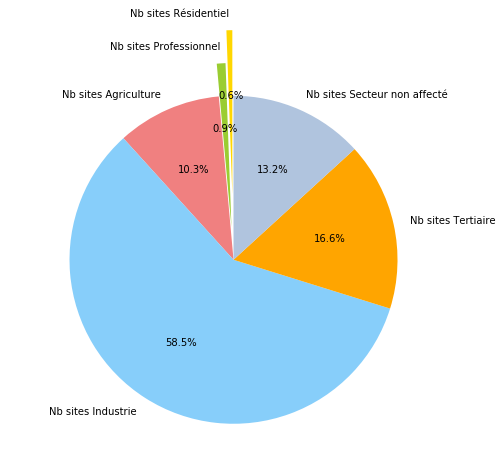

In [42]:
from matplotlib import cm
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Nb sites Résidentiel', 'Nb sites Professionnel', 'Nb sites Agriculture', 'Nb sites Industrie', 'Nb sites Tertiaire', 'Nb sites Secteur non affecté']

sizes = [conso_moyenne_Residence, 
         conso_moyenne_Profess, 
         conso_moyenne_Agri , 
         conso_moyenne_Industrie,
         conso_moyenne_Tertiaire,
         conso_moyenne_Autres]
explode = (0.4, 0.2, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Compute areas and colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'lightsteelblue']

fig1, ax1 = plt.subplots(figsize=(8,8))
fig1.size = (12,12)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [69]:
df_total[df_total["Conso moyenne Résidentiel (MWh)"]== 0]["Nb sites Résidentiel"]

2487      0.0
19799     0.0
60657     0.0
62034     0.0
68160     0.0
113490    0.0
128293    0.0
136246    0.0
142408    0.0
160467    0.0
179857    0.0
180986    0.0
181702    0.0
184837    0.0
188662    0.0
200002    0.0
227621    0.0
227714    0.0
Name: Nb sites Résidentiel, dtype: float64

In [5]:
df_total.head(10)

,Année,Nom commune,Code commune,Nom EPCI,Code EPCI,Type EPCI,Nom département,Code département,Nom région,Code région,...,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2010,Résidences principales après 2011,Taux de chauffage électrique,Geo Shape,Geo Point 2D
0,2015,Le Chay,17097,CA Royan Atlantique,241700640,CA,Charente-Maritime,17,Nouvelle Aquitaine,75,...,19.666680,4.000004,12.333319,30.666675,27.666656,5.333328,0.333339,34.000001,NaN,NaN
1,2014,Bertreville-Saint-Ouen,76085,CC Varenne-et-Scie,247600703,CC,Seine-Maritime,76,Normandie,28,...,33.834586,7.518797,11.278195,24.060150,15.789474,7.518797,0.000000,31.578947,NaN,NaN
2,2014,Laveyssière,24233,CC du Pays de Villamblard,242401107,CC,Dordogne,24,Nouvelle Aquitaine,75,...,41.666636,8.333364,8.333364,18.333401,10.000037,6.666691,6.666507,23.333419,NaN,NaN
3,2013,Souligné-sous-Ballon,72340,CC des Portes du Maine,247200405,CC,Sarthe,72,Pays de la Loire,52,...,36.818186,9.090901,5.681816,22.272726,19.090898,6.818170,0.227303,42.954539,NaN,NaN
4,2011,Calonne-sur-la-Lys,62195,CC Artois Lys,246200802,CC,Pas-de-Calais,62,Hauts-de-France,32,...,3.859057,30.536908,12.583897,29.865762,15.939591,6.040275,1.174509,24.161068,NaN,NaN
5,2012,Saint-Gérons,15189,CC Entre 2 Lacs,200006781,CC,Cantal,15,Auvergne-Rhône-Alpes,84,...,27.826066,5.217360,6.086993,17.391258,24.347797,13.913077,5.217448,14.782623,NaN,NaN
6,2016,Boncourt-le-Bois,21088,CC du Pays de Nuits-Saint-Georges,242101475,CC,Côte-d'Or,21,Bourgogne-Franche-Comté,27,...,22.429909,0.934545,13.084091,25.233636,28.037363,10.280363,0.000092,23.364454,NaN,NaN
7,2016,Gumery,10169,CC du Nogentais,200006716,CC,Aube,10,Grand-Est,44,...,49.038462,10.576923,5.769231,15.384615,7.692308,7.692308,3.846154,28.846154,NaN,NaN
8,2016,Couture-sur-Loir,41070,CC Vallées Loir et Braye,200040780,CC,Loir-et-Cher,41,Centre-Val de Loire,24,...,56.363628,3.181814,10.909070,20.454558,5.909070,2.727256,0.454603,20.454558,NaN,NaN
9,2015,Saint-Martin-Choquel,62759,CC de Desvres-Samer,200018083,CC,Pas-de-Calais,62,Hauts-de-France,32,...,8.749997,6.250016,18.124989,26.874986,27.499981,12.499968,0.000063,20.624970,NaN,NaN


In [9]:
sum_old = df_total["Résidences principales avant 1919"] + df_total["Résidences principales de 1919 à 1945"]
sum_ag = df_total["Résidences principales de 1946 à 1970"] + df_total["Résidences principales de 1971 à 1990"]
sum_new = df_total["Résidences principales de 1991 à 2005"]+df_total["Résidences principales de 2006 à 2010"] + df_total["Résidences principales après 2011"]

In [43]:
df_sums = pd.concat([sum_old, sum_ag, sum_new ],axis=1)

In [46]:
def setlabel(l):
    if l == 0:
        return "Old"
    elif l == 1:
        return "Avg"
    else:
        return "New"

In [47]:
df_sums['max_value_residency'] = df_sums.idxmax(axis=1).apply(setlabel)

In [57]:
df = pd.concat([df_total,df_sums['max_value_residency']],axis=1)

In [65]:
df.groupby(["max_value_residency"]).count()

#["max_value_residency"].value_counts()

,Année,Nom commune,Code commune,Nom EPCI,Code EPCI,Type EPCI,Nom département,Code département,Nom région,Code région,...,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2010,Résidences principales après 2011,Taux de chauffage électrique,Geo Shape,Geo Point 2D
max_value_residency,,,,,,,,,,,,,,,,,,,,,
Avg,85054,85054,85054,85054,85054,85054,85054,85054,85054,85054,...,85054,85054,85054,85054,85054,85054,85054,85054,11935,11935
New,31559,31559,31559,31559,31559,31559,31559,31559,31559,31559,...,31559,31559,31559,31559,31559,31559,31559,31559,4393,4393
Old,117946,117946,117946,117946,117946,117946,117946,117946,117946,117946,...,117946,117946,117946,117946,117946,117946,117946,117946,16236,16236
